# Identifying Pulsars

- The following project is a **classification model** with its aim to **classify** whether a particular object is a **PULSAR OR NOT**.


In [1]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import normalize

In [147]:
from IPython.display import Image

In [19]:
df = pd.read_csv(r"D:\ML\Pulsars\pulsar_stars.csv",low_memory=0)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

# Missing values

In [24]:
miss = dict()
for k in df.columns:
    miss[k]=0
    for i in df[k].isnull():
        if(i== True):
            miss[k]=miss.get(k,0)+1
print("Missing items pairs\n")
for i in miss.items():
    print(i[0],":",i[1])
    

Missing items pairs

 Mean of the integrated profile : 0
 Standard deviation of the integrated profile : 0
 Excess kurtosis of the integrated profile : 0
 Skewness of the integrated profile : 0
 Mean of the DM-SNR curve : 0
 Standard deviation of the DM-SNR curve : 0
 Excess kurtosis of the DM-SNR curve : 0
 Skewness of the DM-SNR curve : 0
target_class : 0


- From the above analysis of data, it is noted that there are **no missing values** and we can proceed with the EDA and normalization.

In [6]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


## Renaming columns for easy lookup
### Reference 
- **Mean**- M
- **Integrated Profile**- IP
- **Standard Deviation**- SD
- **Excess kurtosis**- EK
- **DM-SNR curve**- DSC
- **Skewness**- S

In [21]:
df_raw=df.rename(columns={' Mean of the integrated profile':'M IP',' Standard deviation of the integrated profile':'SD IP',' Excess kurtosis of the integrated profile':'EK IP',' Skewness of the integrated profile':'S IP', ' Mean of the DM-SNR curve':'M DSC',' Standard deviation of the DM-SNR curve':'SD DSC', ' Excess kurtosis of the DM-SNR curve':'EK DSC',' Skewness of the DM-SNR curve':'S DSC'})

In [22]:
df_raw

,M IP,SD IP,EK IP,S IP,M DSC,SD DSC,EK DSC,S DSC,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Distributions of data

### - Target Variable

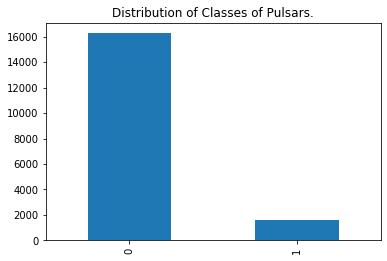

In [267]:
df_raw.target_class.value_counts().plot.bar()
plt.title("Distribution of Classes of Pulsars.")
plt.savefig(r'D:\ML\Pulsars\raw_distribution.png',dpi=200)

### - Independent Variables

- Analysis shows that data is highly biased.
- Accuracy metric of the classifier would give invalid results due to **imbalance in the class distribution**

# Evaluation metrics

###   F1 Score, Precision and Recall
- It is calculated as the **harmonic mean of the precision and the recall of the model**
- **Precision and Recall** functions are defined below.
- The **confusion matrix** for the data is also a metric which helps to identify the no. of correct and incorrect predictions for our model


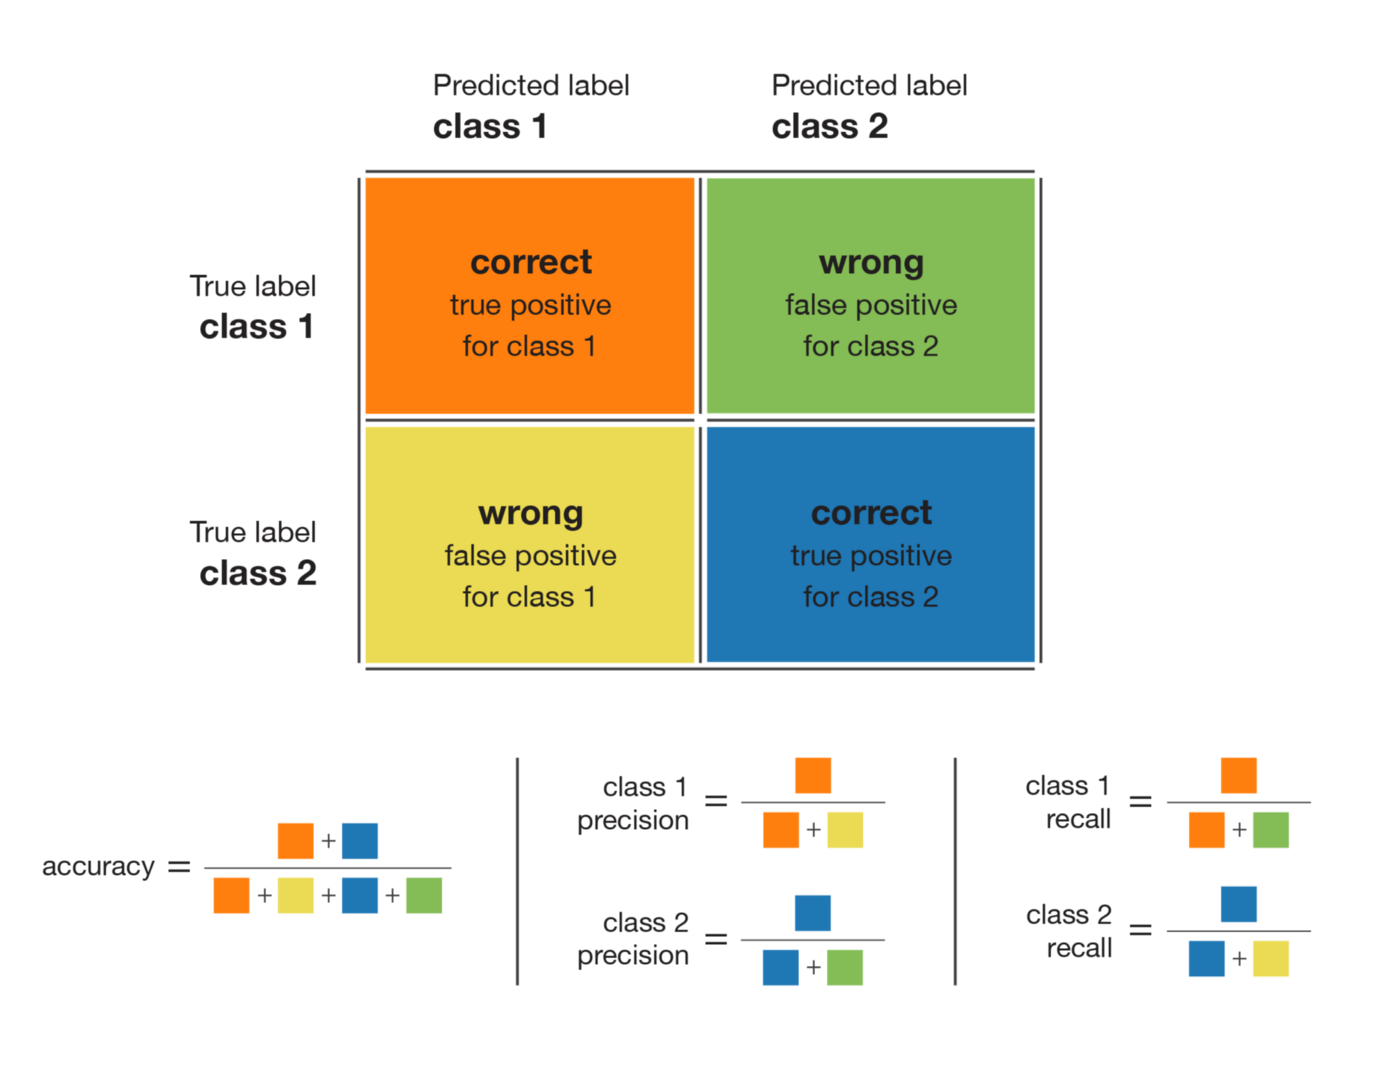

In [150]:
Image(r"D:\ML\Pulsars\Confusion_matrix.png")

In [10]:
def prec(preds,valid):
    tp=0
    fp=0
    for i,j in zip(preds,valid):
        if(i==j and i==j):
            tp+=1
        if(i==1 and j==0):
            fp+=1
    return(tp/(fp+tp))

In [12]:
def recall(preds,valid):
    tp=0
    fn=0
    for i,j in zip(preds,valid):
        if(i==j and i==1):
            tp+=1
        if(i==0 and j==1):
            fn+=1
    return(tp/(tp+fn))

### Splitting Data into a Validation and Training set 

In [27]:
train_raw = df_raw.drop('target_class',axis=1)
y_raw = df_raw['target_class']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(train_raw,y_raw,test_size = 0.2,train_size=0.8,random_state=42)

In [77]:
x_train.head(n=3)

,M IP,SD IP,EK IP,S IP,M DSC,SD DSC,EK DSC,S DSC
14453,108.765625,47.520470,0.191285,0.007945,2.921405,18.009581,8.468258,84.137111
15797,121.554688,50.909357,0.083099,-0.087226,1.098662,11.590431,14.180137,242.867752
4510,100.265625,43.808975,0.233088,0.451613,1.142977,13.774721,14.148388,215.404864


In [78]:
y_train.head(n=3)

14453    0
15797    0
4510     0
Name: target_class, dtype: int64

## Plotting class distributions for training and valdiation data

In [80]:
y_train.value_counts()

0    13000
1     1318
Name: target_class, dtype: int64

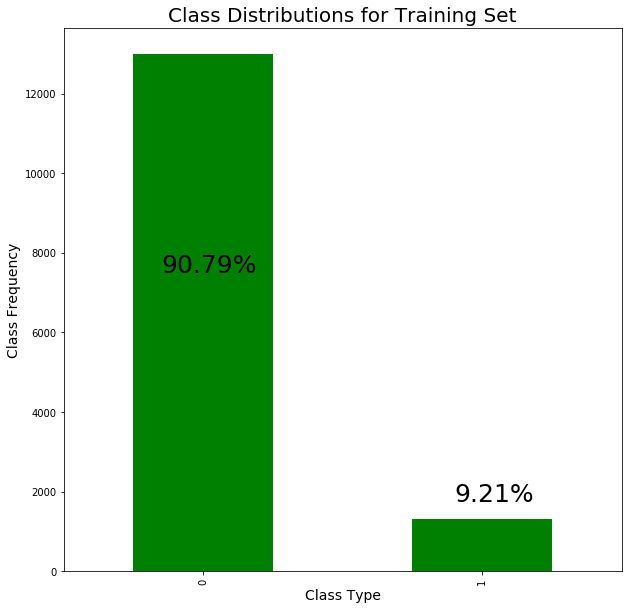

In [145]:
plt.title("Class Distributions for Training Set",fontsize=20)
plt.xlabel("Class Type",fontsize=14)
plt.ylabel("Class Frequency",fontsize=14)
zeroes = str(round(y_train.value_counts()[0]/len(y_train),4)*100)+'%'
ones = str(round(y_train.value_counts()[1]/len(y_train),4)*100)+'%'
plt.text(-0.15,7500,zeroes,fontsize=25)
plt.text(0.9,1750,ones,fontsize=25)
y_train.value_counts().plot.bar(color = 'green',figsize = (10,10))
plt.savefig(r"D:\ML\Pulsars\train_distribution.png",dpi=200)

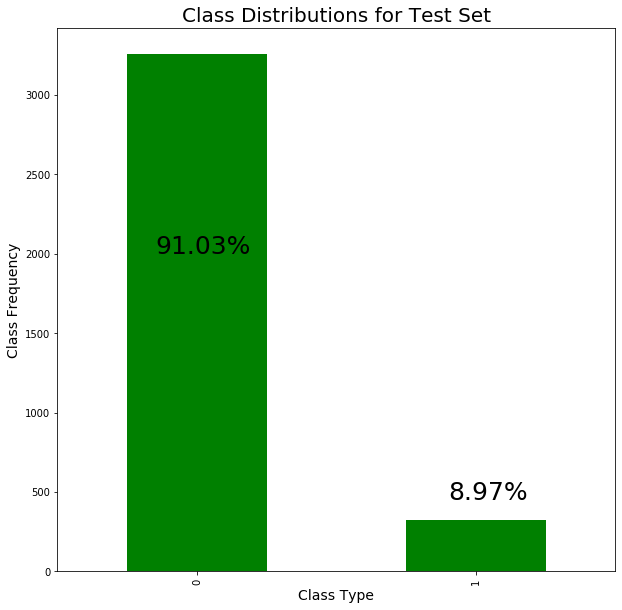

In [146]:
plt.title("Class Distributions for Test Set",fontsize=20)
plt.xlabel("Class Type",fontsize=14)
plt.ylabel("Class Frequency",fontsize=14)
zeroes2 = str(round(y_test.value_counts()[0]/len(y_test),4)*100)+'%'
ones2 = str(round(y_test.value_counts()[1]/len(y_test),4)*100)+'%'
plt.text(-0.15,2000,zeroes2,fontsize=25)
plt.text(0.9,450,ones2,fontsize=25)
y_test.value_counts().plot.bar(color = 'green',figsize = (10,10))
plt.savefig(r"D:\ML\Pulsars\test_distributions.png",dpi=200)

## Inference
- The above plots clearly show that both the **training and the test sets** are imbalanced in their class distributions .
- It also shows that, although biased, the distributions are **of the same ratio in  both training and test sets**. 
- The above point ensures that whatever model we train over our training set is going to experience a **same level of bias** in the test set too.

# Scaling data for knn classifications

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## MIN-MAX AND STANDARD SCALING

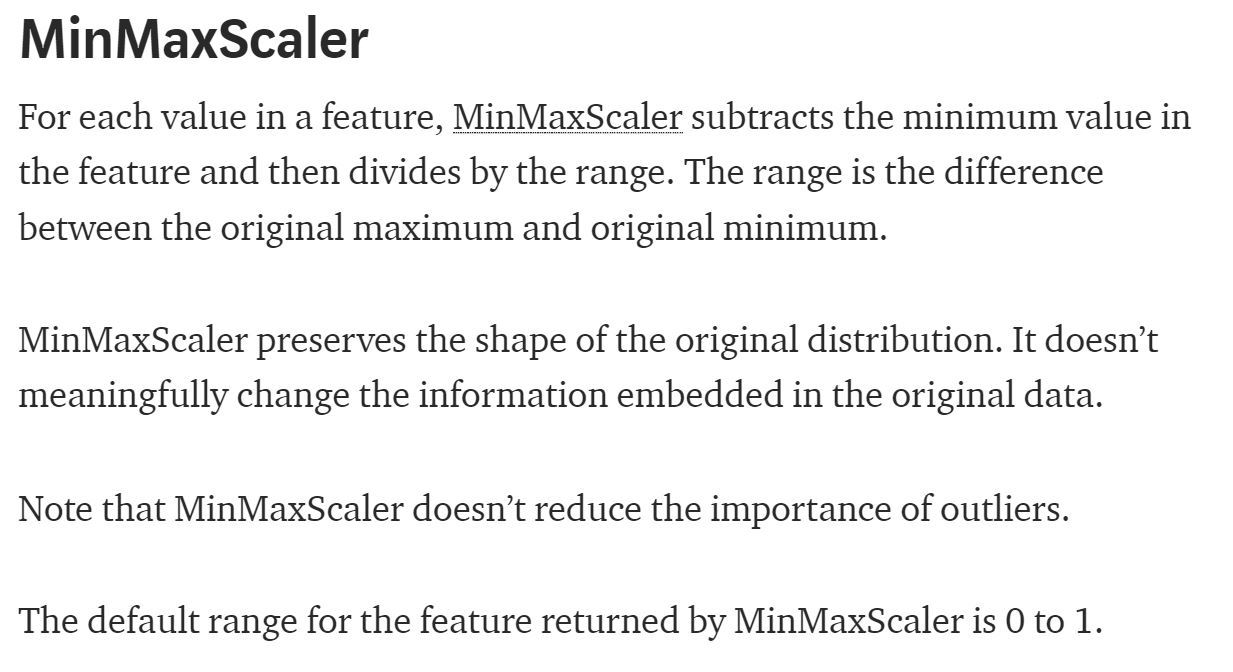

In [253]:
Image(r"D:\ML\Pulsars\min_max.png")

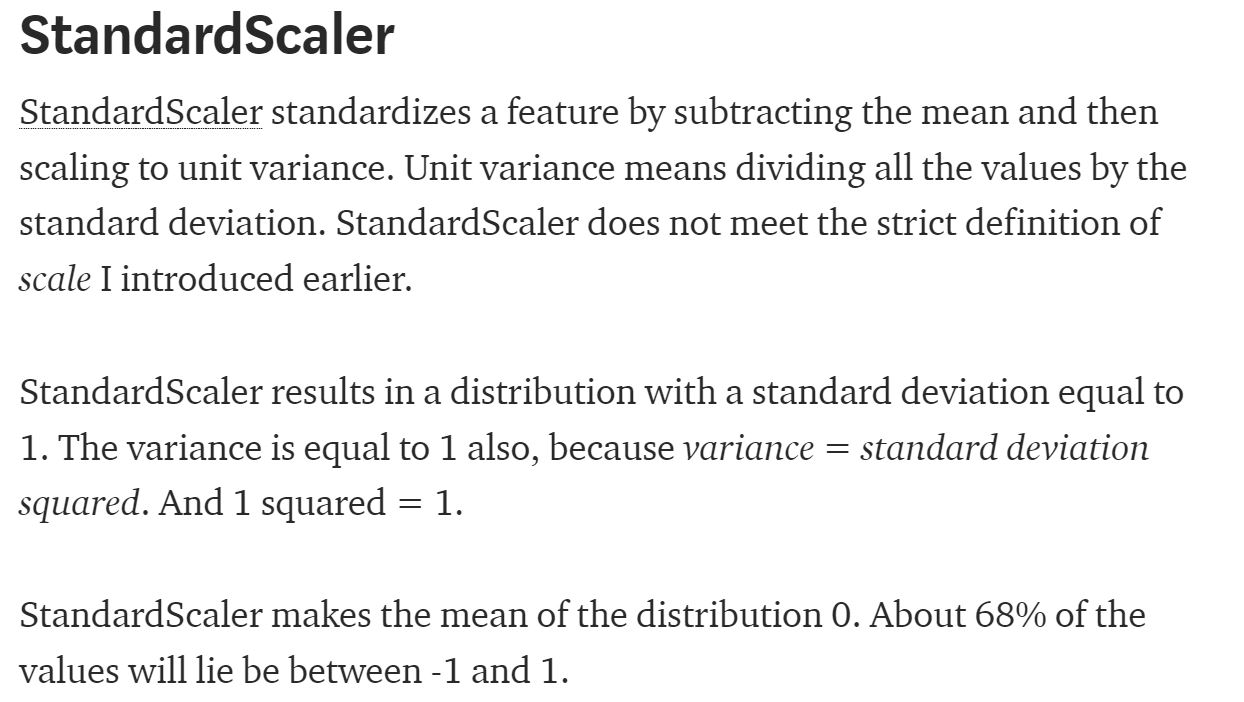

In [254]:
Image(r"D:\ML\Pulsars\STD_SCALER.PNG")

In [91]:
minmax= MinMaxScaler()
std = StandardScaler()
minmax.fit(x_train)
std.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
min_xtrain = pd.DataFrame(minmax.transform(x_train),columns = x_train.columns)

In [255]:
min_xtrain.describe()

,M IP,SD IP,EK IP,S IP,M DSC,SD DSC,EK DSC,S DSC
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,0.563527,0.294131,0.236658,0.050903,0.055696,0.183074,0.304325,0.090181
std,0.137275,0.092328,0.106742,0.087985,0.132644,0.188846,0.120261,0.090416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.508511,0.237635,0.191262,0.022935,0.007628,0.068182,0.237153,0.031221
50%,0.585484,0.299530,0.211090,0.028511,0.011588,0.107208,0.307125,0.071313
75%,0.649095,0.354288,0.236124,0.038938,0.023376,0.202301,0.367870,0.119006
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
min_xtest = pd.DataFrame( minmax.transform(x_test), columns = x_train.columns)

In [155]:
std_xtrain = pd.DataFrame(std.transform(x_train),columns = x_train.columns)

In [264]:
std_xtrain.describe()

,M IP,SD IP,EK IP,S IP,M DSC,SD DSC,EK DSC,S DSC
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,-8.908613e-17,7.091610e-16,1.417244e-17,-3.412552e-17,3.495520e-17,1.132865e-17,-3.670451e-16,-1.573759e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.105247e+00,-3.185842e+00,-2.217175e+00,-5.785606e-01,-4.199079e-01,-9.694685e-01,-2.530626e+00,-9.974420e-01
25%,-4.007893e-01,-6.119263e-01,-4.253022e-01,-3.178782e-01,-3.624010e-01,-6.084102e-01,-5.585661e-01,-6.521247e-01
50%,1.599521e-01,5.848197e-02,-2.395366e-01,-2.544987e-01,-3.325460e-01,-4.017452e-01,2.328398e-02,-2.086906e-01
75%,6.233520e-01,6.515878e-01,-5.006169e-03,-1.359962e-01,-2.436730e-01,1.018200e-01,5.284156e-01,3.188089e-01
max,3.179668e+00,7.645531e+00,7.151513e+00,1.078746e+01,7.119315e+00,4.326040e+00,5.784920e+00,1.006298e+01


In [156]:
std_xtest = pd.DataFrame(std.transform(x_test),columns = x_train.columns)

# Making model
- The model used in this classification problem is K-Nearest Neighbors Classifier.

## Importing model.

In [157]:
from sklearn.neighbors import KNeighborsClassifier


In [194]:
from sklearn.metrics import confusion_matrix

In [235]:
def show_labels(c):
    plt.text(0.4,0.75,c[0][0],fontsize=15)## True negatives
    plt.text(1.4,0.75,c[0][1],fontsize=15)## False positives
    plt.text(0.4,1.25,c[1][0],fontsize=15)## False Negatives
    plt.text(1.4,1.25,c[1][1],fontsize=15)## True Positives

## Min Max Scaled Data

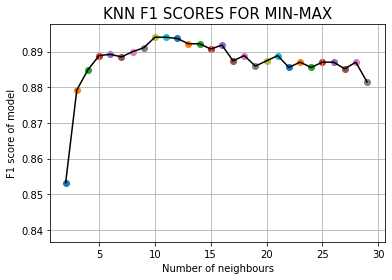

In [256]:
plt.xlabel("Number of neighbours")
plt.ylabel("F1 score of model")
fs=[]
for i in range(2,30):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance',metric='euclidean')
        knn.fit(min_xtrain,y_train)
        fs.append(f1_score(y_test, knn.predict(min_xtest)))
        plt.scatter(i,f1_score(y_test, knn.predict(min_xtest)))
plt.title("KNN F1 SCORES FOR MIN-MAX",fontsize=15)
plt.plot([i for i in range(2,30)],fs,color='black')
plt.grid()
plt.savefig(r'D:\ML\Pulsars\knn_f1_minmax.png',dpi=200)

## Analysis
- Maximum score attained on 10 neighbours.
- Final model is built with **10 neighbours and euclidean distance as distance metric**.

In [257]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance',metric = 'euclidean')
knn.fit(min_xtrain,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [258]:
preds1 = knn.predict(min_xtest)
print("MIN MAX SCALED CLASSIFIER")
print("Precision:",prec(preds1,y_test))
print("Recall:",recall(preds1,y_test))
print("F1 score:",f1_score(y_test,preds1))
print("Accuracy:",accuracy_score(y_test,preds1))
match1=0
for i,j in zip(preds1,y_test):
    if(i==j):
        match1+=1
print("Number of matches:",match1)
print("Number of mismatches:",len(x_test)-match1)

MIN MAX SCALED CLASSIFIER
Precision: 0.9963162368943044
Recall: 0.8411214953271028
F1 score: 0.8940397350993378
Accuracy: 0.982122905027933
Number of matches: 3516
Number of mismatches: 64


## CONFUSION MATRIX FOR MIN-MAX SCALING

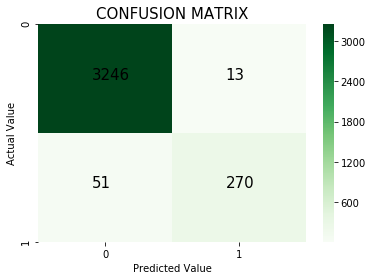

In [259]:
c1 = confusion_matrix(y_test,preds1)
sns.heatmap(c1,cmap = 'Greens')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
show_labels(c1)
plt.savefig("D:\ML\Pulsars\c_matrix_minmax.png",dpi=200)


- Fitting on data scaled by **z1 score**

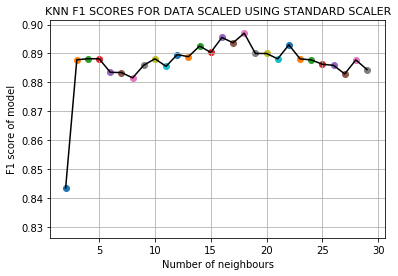

In [265]:
plt.xlabel("Number of neighbours")
plt.ylabel("F1 score of model")
fs2=[]
for i in range(2,30):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance',metric='euclidean')
        knn.fit(std_xtrain,y_train)
        fs2.append(f1_score(y_test, knn.predict(std_xtest)))
        plt.scatter(i,f1_score(y_test, knn.predict(std_xtest)))
plt.title("KNN F1 SCORES FOR DATA SCALED USING STANDARD SCALER",fontsize=11)
plt.plot([i for i in range(2,30)],fs2,color='black')
plt.grid()
plt.savefig(r'D:\ML\Pulsars\knn_f1_std.png',dpi=200)

## Analysis
- The best f1 score attained at **18 neighbours**
- The final model is built using **18 neighbours and distance metric as euclidean**

In [261]:
knn = KNeighborsClassifier(n_neighbors=18,n_jobs=-1,weights = 'distance',metric='euclidean')
knn.fit(std_xtrain,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=18, p=2,
                     weights='distance')

In [262]:
preds2 = knn.predict(std_xtest)
print("Z1 SCALED CLASSIFIER")
print("Precision:",prec(preds2,y_test))
print("Recall:",recall(preds2,y_test))
print("F1 score:",f1_score(y_test,preds2))
print("Acuuracy:",accuracy_score(y_test,preds2))
match2=0
for i,j in zip(preds2,y_test):
    if(i==j):
        match2+=1
print("Number of matches:",match2)
print("Number of mismatches:",len(x_test)-match2)

Z1 SCALED CLASSIFIER
Precision: 0.996882969679796
Recall: 0.8411214953271028
F1 score: 0.8970099667774086
Acuuracy: 0.9826815642458101
Number of matches: 3518
Number of mismatches: 62


## CONFUSION MATRIX FOR STANDARD SCALING

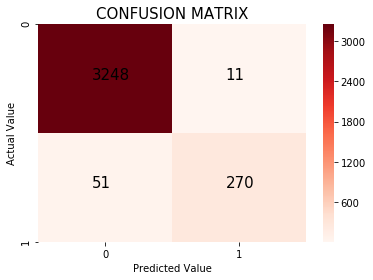

In [263]:
c2= confusion_matrix(y_test,preds2)
sns.heatmap(c2,cmap='Reds')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
show_labels(c2)
plt.savefig("D:\ML\Pulsars\cmatrix_std.png",dpi=200)


# FINAL MODELS
##  KNN classifiers
### - Model1
- Scaling- Min-Max
- Number of neighbours-10
- Precision: 0.9963162368943044
- Recall: 0.8411214953271028
- F1 score: 0.8940397350993378
- Accuracy: 0.982122905027933

### - Model2
- Scaling- Standard Scaler
- Number of neighbours-18
- Precision: 0.996882969679796
- Recall: 0.8411214953271028
- F1 score: 0.8970099667774086
- Acuuracy: 0.9826815642458101